In [1]:
from __future__ import division
from framed.io_utils.sbml import load_cbmodel
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style("white")

In [2]:
model = load_cbmodel('../../models/iAF1260.xml', flavor='cobra')

In [5]:
for r_id, gpr in model.gpr_associations.items():
    if gpr is not None:
        for protein in gpr.proteins:
            if 's0001' in protein.genes:
                gpr.proteins.remove(protein)
            else:
                protein.genes = sorted(protein.genes)

complexes = {}
for r_id, gpr in model.gpr_associations.items():
    if gpr is not None:
        for protein in gpr.proteins:
            complexes[str(protein)] = protein

complex_size = [len(pc.genes) for pc in complexes.values()]

isozyme_number = [len(gpr.proteins) for gpr in model.gpr_associations.values()
                  if gpr is not None and len(gpr.proteins) > 0]

rxn2complex = {}
for r_id, gpr in model.gpr_associations.items():
    if gpr is not None:
        rxn2complex[r_id] = [str(protein) for protein in gpr.proteins]

complex2rxn = {}
for pc in complexes:
    complex2rxn[pc] = []
    for r_id, pcs in rxn2complex.items():
        if pc in pcs:
            complex2rxn[pc].append(r_id)

promiscuity = [len(rxns) for rxns in complex2rxn.values()]

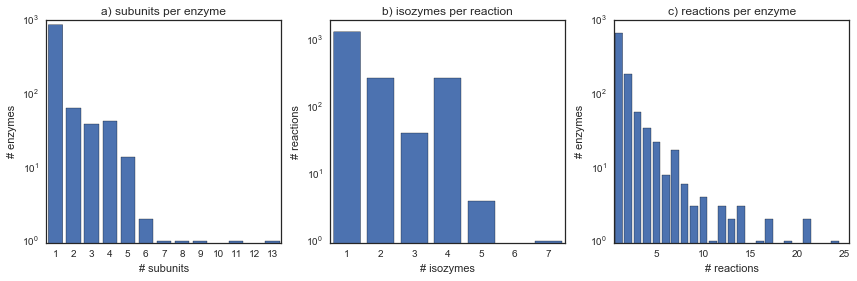

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(complex_size, log=True, bins=np.arange(0.5, 14.5), rwidth=0.8, align='mid')
plt.ylim((0.95, 1e3))
plt.xlim((0.5, 13.5))
plt.xticks(range(1,14));
plt.xlabel('# subunits')
plt.ylabel('# enzymes')
plt.title('a) subunits per enzyme')

plt.subplot(1,3,2)
plt.hist(isozyme_number, log=True, bins=np.arange(0.5, 8.5), rwidth=0.8, align='mid')
plt.ylim((0.95, 2e3))
plt.xlim((0.5, 7.5))
plt.xlabel('# isozymes')
plt.ylabel('# reactions')
plt.title('b) isozymes per reaction')

plt.subplot(1,3,3)
plt.hist(promiscuity, log=True, bins=np.arange(0.5, 25.5), rwidth=0.8, align='mid')
plt.ylim((0.95, 1e3))
plt.xlim((0.5, 25.5))
plt.xlabel('# reactions')
plt.ylabel('# enzymes')
plt.title('c) reactions per enzyme')
plt.tight_layout()
plt.savefig('../../results/statistics/statistics_iAF1260.png', dpi=150)

In [ ]:
plt.figure(figsize=(2.5,1.5))
plt.hist(promiscuity, log=True, bins=np.linspace(0, 250, 25), rwidth=0.8, align='mid')
plt.ylim((0.95, 2e3))
plt.xlim((0, 250))
plt.tight_layout()
plt.savefig('../../results/statistics/overlay_iAF1260.png', dpi=150)